Author: Michael Stoll \
5/22/2024 \
\
Full transparency, Beckham and I worked together loosely for part of this, \
and I heavily referenced a few online resources but, mostly, I worked my \
way through the warmup-mwolff2021 repo to try and get a handle on what I was doing. \
On my honor as a former Boy Scout, I swear I didn't copy and paste anything, \
but I really just reverse-engineered Wolff's code to figure out how to do this. \
Could I do it again, all by myself, right now? No. \
But, do I now at least understand the concept of what I'm doing, \
and could I sketch out how to do this in pseudocode? Probably.



C:\Users\micha\AppData\Local\Temp\ipykernel_48092\1003594888.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['total sulfur dioxide'] = dr['total sulfur dioxide'].apply(lambda x: x / 7)


<Axes: >

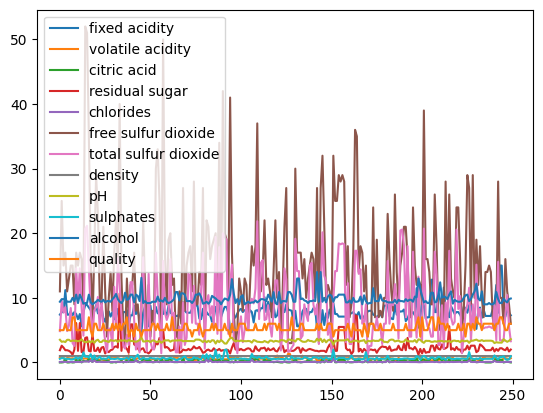

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.model_selection
import sklearn.linear_model

from sklearn import metrics
from sklearn import linear_model

data = pd.read_csv("winequality-red.csv", sep=';')
#this is just for the sake of visualizing the data better
#the alteration to the total sulfur dioxide numbers is just so I can see the other stats in relation to it
#really this whole section is just about seeing how the stats correlate with one another
dr = data.head(250)
dr['total sulfur dioxide'] = dr['total sulfur dioxide'].apply(lambda x: x / 7)
dr.plot()

In [2]:
#I labeled these "features" and "target" to keep them straight in my head.
#Features holds all of the wine quality stats that aren't quality, target holds all of the wine quality stats that ARE quality.
features = data.drop(columns= ['quality'])
target = data['quality']
#this is the part where the actual data manipulation begins.
#the whole point of this function is to fragment the data off, so that we have a portion of data (75%) to train the linear regression from,
#and a separate portion (25%) to test the data against. 
#from what I'm seeing, random_state is basically just a seed for the random distribution of the data. test_size is pretty self explanatory.
features_train, features_test, target_train, target_test = sklearn.model_selection.train_test_split(features, target, test_size=.25, random_state=173)

In [3]:
#now we create the actual linear regression, and fit it with our training data.
lreg = sklearn.linear_model.LinearRegression()
lreg.fit(features_train, target_train)
#from what I gather, the closer these coefficients are to 0, the better the fit of the regression.
print(lreg.coef_)

[ 5.16870228e-03 -1.14363877e+00 -1.60278870e-01  9.64105308e-03
 -1.81592654e+00  4.64762217e-03 -3.08589575e-03 -3.70654025e+00
 -6.18840921e-01  8.29803396e-01  3.01369794e-01]


In [4]:
#this is what the linear regression thinks the wine qualities of the test data will be, based on the training data.
targetPred = lreg.predict(features_test)
targetPred  

array([5.4883986 , 5.05244227, 5.0631163 , 5.21191739, 6.08166724,
       5.45788885, 5.66241072, 5.75620395, 5.01599825, 5.88160566,
       6.00854421, 5.41147359, 5.37402877, 5.36383302, 5.32995357,
       5.37144249, 6.34319888, 5.35848711, 6.40921692, 5.62698211,
       5.75105969, 5.09878117, 5.30758514, 6.49299732, 6.21126609,
       6.14446151, 5.8506122 , 6.17770886, 5.64449066, 6.51326584,
       5.72293139, 4.95632396, 5.77166561, 5.40036719, 5.98699348,
       5.56795199, 5.29385522, 5.42409807, 5.73924163, 6.52565298,
       6.50742953, 6.51268884, 5.34508917, 5.30803552, 5.63578006,
       5.77694862, 5.88089226, 5.83108832, 6.66037034, 5.63578006,
       5.29586725, 6.43206732, 5.31684436, 5.60820402, 5.86326497,
       6.76347985, 6.32709221, 5.56902014, 6.8996389 , 5.04850261,
       5.71948544, 6.12646369, 5.63200147, 6.46098463, 5.52979274,
       5.56372186, 5.36257976, 5.66565393, 6.20844814, 5.8823396 ,
       5.12817524, 5.94890214, 5.57253573, 5.72688533, 5.26642

In [5]:
#these are pretty self-explanatory indicators of error.
#as a general rule, a higher r2 score than a mean^2 error means a better fit.
m2e = sklearn.metrics.mean_squared_error(target_test, targetPred)
r2 = sklearn.metrics.r2_score(target_test, targetPred)
print("the mean^2 error is " + str(m2e), "\nand the r^2 score is " + str(r2))
features_test = pd.DataFrame(features_test)

the mean^2 error is 0.4382738826864212 
and the r^2 score is 0.3117288167933395


Text(0, 0.5, 'Wine Quality')

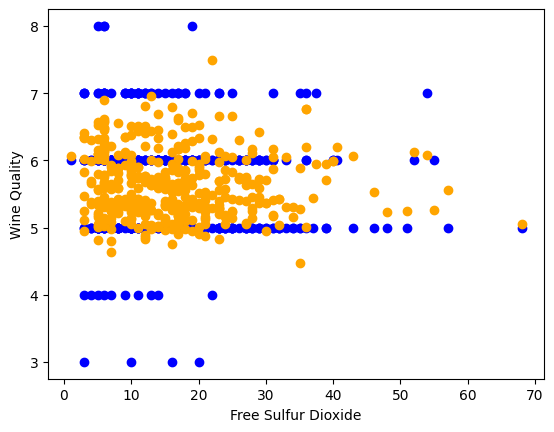

In [6]:
#all this does is build a scatter plot that contrasts the actual values and the predicted values
#of course, the actual values are all whole numbers, and the predictions are not
fsd = features_test['free sulfur dioxide']

plt.scatter(fsd, target_test, color='blue')

plt.scatter(fsd, targetPred, color='orange')

plt.xticks()
plt.xlabel('Free Sulfur Dioxide')
plt.yticks()
plt.ylabel('Wine Quality')

In [7]:
#I'm still not 100% sure what this one does, but I've gathered enough to realize
#that this classifier fits to the training data like the linear regression
#and just attempts to predict the target from the provided features.
rclass = linear_model.RidgeClassifier()
rclass.fit(features_train, target_train)
rclassPred = rclass.predict(features_test)
#then this bit just checks the accuracy of the prediction
acc = metrics.accuracy_score(target_test, rclassPred)
print("Accuracy is " + str(acc))

Accuracy is 0.595


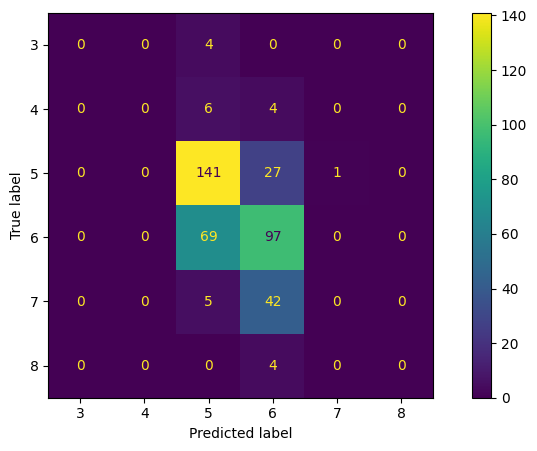

In [8]:
#as previously sworn, I did not copy/paste any of this, but I still don't really understand how it builds the matrix.
#all that I know is that I'm feeding the test data and the predicted data in so they can populate the data,
#and that the data along the diagonal is the "true positive" section, meaning that the predicted qualities matched the actuals.
#everything that diverges from the diagonal represents an entry that was predicted to be different than it actually was
#for example, 69 bottles of wine were predicted to have a quality of 5, but actually had a quality of 6.
fig, ax = plt.subplots(figsize=(10,5))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(target_test, rclassPred, ax=ax)